In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [11]:
pip install pandas matplotlib nltk wordcloud


Note: you may need to restart the kernel to use updated packages.


In [12]:
df=pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv")

In [13]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       40000 non-null  object 
 1   label      40000 non-null  int64  
 2   compound   40000 non-null  float64
 3   sentiment  40000 non-null  int64  
 4   emojis     40000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


In [14]:

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
df['compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 1 if x > 0 else 0)



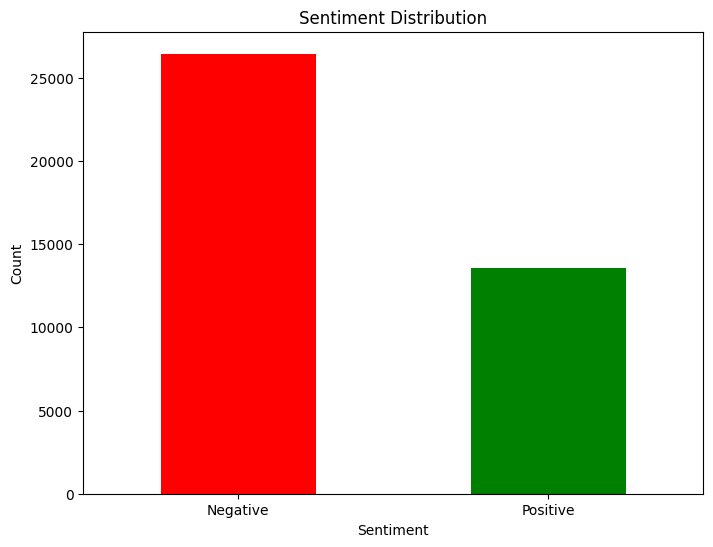

In [15]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()



In [16]:
# Word Clouds for positive and negative sentiments
positive_words = ' '.join(df[df['sentiment'] == 1]['text'])
negative_words = ' '.join(df[df['sentiment'] == 0]['text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)



(-0.5, 799.5, 399.5, -0.5)

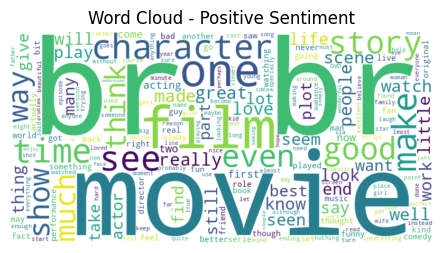

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiment')
plt.axis('off')



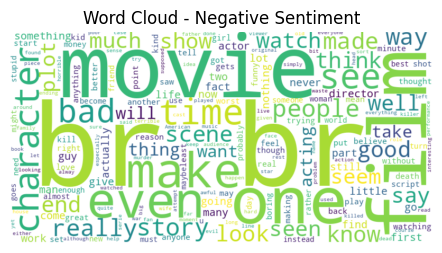

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiment')
plt.axis('off')

plt.show()

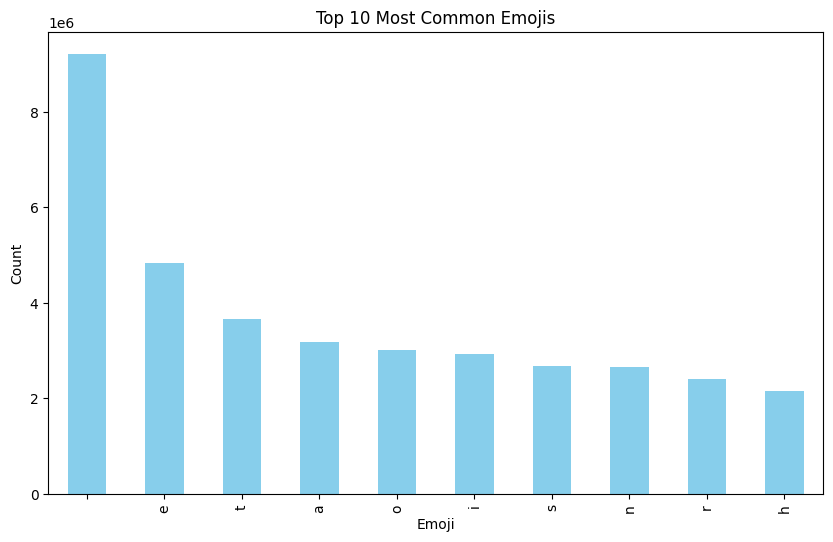

In [24]:
import emoji

# Extract emojis from the 'text' column using emoji.demojize
df['emojis'] = df['text'].apply(lambda x: ''.join(emoji.demojize(c) for c in x))

# Count the occurrence of each emoji
emoji_counts = df['emojis'].apply(lambda x: pd.value_counts(list(x))).sum(axis=0).sort_values(ascending=False)

# Plot a bar chart of the most common emojis
top_emoji_counts = emoji_counts.head(10)
plt.figure(figsize=(10, 6))
top_emoji_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Emojis')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.show()


